In [1]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
from torch import nn  #nn中有大量定义好的神经网络的层
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
##导入数据
input_file_name = "E:/实验数据/P_train.csv"
input_data = pd.read_csv(input_file_name).values

height_file_name = "E:/实验数据/P_height.csv"
height_data = pd.read_csv(height_file_name).values

##转换成array
input_data = input_data.astype('double')
height_data = height_data.astype('double')

In [3]:
##归一化
x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

input_data = x_scaler.fit_transform(input_data)
height_data = y_scaler.fit_transform(height_data)

In [4]:
#转换成tensor
input_total = torch.tensor(input_data,dtype=torch.float32)     #只经过归一化的原始数据集
height_labels = torch.tensor(height_data,dtype=torch.float32)
print(input_total.shape)
print(height_labels.shape)

torch.Size([1350, 4])
torch.Size([1350, 1])


In [5]:
k = 4
kmodel = KMeans(n_clusters = k, random_state=1).fit(input_data)   ##对输入数据进行 K-Means聚类
# kmodel.cluster_centers_    ##这个存放了结果的中心点
# print(kmodel.labels_ )     ##这个存放了每个点的分类


In [6]:
#计算两个向量的欧式距离, 输入一定要是同纬度的 np.array 类型的向量  
def distance(vector_A, vector_B):
    dis = vector_A - vector_B
    dis = np.sum((dis**2))**0.5
    return dis

In [7]:
##@算一下每一类点距离中心点的均值, 设定一个边界距离, 大于这个距离的点都筛掉

res = np.zeros(k)  ##存放每个类的数据点距离中心点的距离之和
cnt = np.zeros(k)  ##存放每个类的数据点的个数
for i in range(height_data.shape[0]):
    dot_type = kmodel.labels_[i]
    res[dot_type] = res[dot_type] + distance(kmodel.cluster_centers_[dot_type], input_data[i])
    cnt[dot_type] = cnt[dot_type] + 1

boundary_distance = res / cnt   ## 计算边界距离

k_means_data = []    ##用来保存经过筛除后的输入数据, 定义成list方便添加元素, 之后转换成np.array
k_means_height = []  ##用来保存经过筛除后的高度
##筛点
for i in range(height_data.shape[0]):
    dot_type = kmodel.labels_[i]
    if (distance(input_data[i], kmodel.cluster_centers_[dot_type])) < (boundary_distance[dot_type]):
            k_means_data.append(input_data[i])
            k_means_height.append(height_data[i])

k_means_data = np.array(k_means_data)
k_means_height = np.array(k_means_height)

k_means_data = torch.tensor(k_means_data, dtype=torch.float32)    ##将经过筛除的数据转换成tensor 准备打包成数据迭代器, 送入神经网络
k_means_height = torch.tensor(k_means_height, dtype=torch.float32)
print(k_means_data.shape)
print(k_means_height.shape)

torch.Size([955, 4])
torch.Size([955, 1])


In [8]:
batch_size, n_train = 16, 700
train_iter = d2l.load_array((k_means_data[:n_train], k_means_height[:n_train]), batch_size, is_train=True)
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 20),nn.ReLU(), nn.Linear(20, 1))
    net.apply(init_weights)
    return net

loss = nn.MSELoss()

epoch 1, loss: 0.009573
epoch 2, loss: 0.002504
epoch 3, loss: 0.002303
epoch 4, loss: 0.002266
epoch 5, loss: 0.001907
epoch 6, loss: 0.001867
epoch 7, loss: 0.001803
epoch 8, loss: 0.001821
epoch 9, loss: 0.001957
epoch 10, loss: 0.001832
epoch 11, loss: 0.002029
epoch 12, loss: 0.002284
epoch 13, loss: 0.001798
epoch 14, loss: 0.001950
epoch 15, loss: 0.001718
epoch 16, loss: 0.001891
epoch 17, loss: 0.001790
epoch 18, loss: 0.002153
epoch 19, loss: 0.001914
epoch 20, loss: 0.001718
epoch 21, loss: 0.002417
epoch 22, loss: 0.001784
epoch 23, loss: 0.002514
epoch 24, loss: 0.001575
epoch 25, loss: 0.001827
epoch 26, loss: 0.001802
epoch 27, loss: 0.001964
epoch 28, loss: 0.001851
epoch 29, loss: 0.001748
epoch 30, loss: 0.001700
epoch 31, loss: 0.002715
epoch 32, loss: 0.001540
epoch 33, loss: 0.001608
epoch 34, loss: 0.001639
epoch 35, loss: 0.002479
epoch 36, loss: 0.001531
epoch 37, loss: 0.001829
epoch 38, loss: 0.001596
epoch 39, loss: 0.001582
epoch 40, loss: 0.002242
epoch 41,

epoch 325, loss: 0.001360
epoch 326, loss: 0.001505
epoch 327, loss: 0.001388
epoch 328, loss: 0.001384
epoch 329, loss: 0.001355
epoch 330, loss: 0.001447
epoch 331, loss: 0.001499
epoch 332, loss: 0.001408
epoch 333, loss: 0.001522
epoch 334, loss: 0.001426
epoch 335, loss: 0.001432
epoch 336, loss: 0.001418
epoch 337, loss: 0.001420
epoch 338, loss: 0.001338
epoch 339, loss: 0.001348
epoch 340, loss: 0.001395
epoch 341, loss: 0.001450
epoch 342, loss: 0.001575
epoch 343, loss: 0.001416
epoch 344, loss: 0.001365
epoch 345, loss: 0.001687
epoch 346, loss: 0.001349
epoch 347, loss: 0.001586
epoch 348, loss: 0.001368
epoch 349, loss: 0.001536
epoch 350, loss: 0.001392
epoch 351, loss: 0.001462
epoch 352, loss: 0.001705
epoch 353, loss: 0.001392
epoch 354, loss: 0.001563
epoch 355, loss: 0.001543
epoch 356, loss: 0.001487
epoch 357, loss: 0.001336
epoch 358, loss: 0.001506
epoch 359, loss: 0.001328
epoch 360, loss: 0.001359
epoch 361, loss: 0.001368
epoch 362, loss: 0.001546
epoch 363, l

epoch 642, loss: 0.001289
epoch 643, loss: 0.001332
epoch 644, loss: 0.001477
epoch 645, loss: 0.001360
epoch 646, loss: 0.001319
epoch 647, loss: 0.001342
epoch 648, loss: 0.001399
epoch 649, loss: 0.001324
epoch 650, loss: 0.001454
epoch 651, loss: 0.001522
epoch 652, loss: 0.001292
epoch 653, loss: 0.001323
epoch 654, loss: 0.001310
epoch 655, loss: 0.001441
epoch 656, loss: 0.001325
epoch 657, loss: 0.001372
epoch 658, loss: 0.001341
epoch 659, loss: 0.001367
epoch 660, loss: 0.001445
epoch 661, loss: 0.001339
epoch 662, loss: 0.001310
epoch 663, loss: 0.001362
epoch 664, loss: 0.001337
epoch 665, loss: 0.001349
epoch 666, loss: 0.001335
epoch 667, loss: 0.001360
epoch 668, loss: 0.001333
epoch 669, loss: 0.001448
epoch 670, loss: 0.001330
epoch 671, loss: 0.001329
epoch 672, loss: 0.001350
epoch 673, loss: 0.001538
epoch 674, loss: 0.001352
epoch 675, loss: 0.001315
epoch 676, loss: 0.001336
epoch 677, loss: 0.001505
epoch 678, loss: 0.001348
epoch 679, loss: 0.001306
epoch 680, l

epoch 959, loss: 0.001366
epoch 960, loss: 0.001431
epoch 961, loss: 0.001309
epoch 962, loss: 0.001325
epoch 963, loss: 0.001282
epoch 964, loss: 0.001346
epoch 965, loss: 0.001321
epoch 966, loss: 0.001413
epoch 967, loss: 0.001292
epoch 968, loss: 0.001389
epoch 969, loss: 0.001290
epoch 970, loss: 0.001331
epoch 971, loss: 0.001327
epoch 972, loss: 0.001280
epoch 973, loss: 0.001318
epoch 974, loss: 0.001409
epoch 975, loss: 0.001353
epoch 976, loss: 0.001378
epoch 977, loss: 0.001432
epoch 978, loss: 0.001445
epoch 979, loss: 0.001358
epoch 980, loss: 0.001466
epoch 981, loss: 0.001331
epoch 982, loss: 0.001455
epoch 983, loss: 0.001343
epoch 984, loss: 0.001336
epoch 985, loss: 0.001344
epoch 986, loss: 0.001362
epoch 987, loss: 0.001341
epoch 988, loss: 0.001313
epoch 989, loss: 0.001291
epoch 990, loss: 0.001410
epoch 991, loss: 0.001317
epoch 992, loss: 0.001308
epoch 993, loss: 0.001501
epoch 994, loss: 0.001339
epoch 995, loss: 0.001348
epoch 996, loss: 0.001402
epoch 997, l

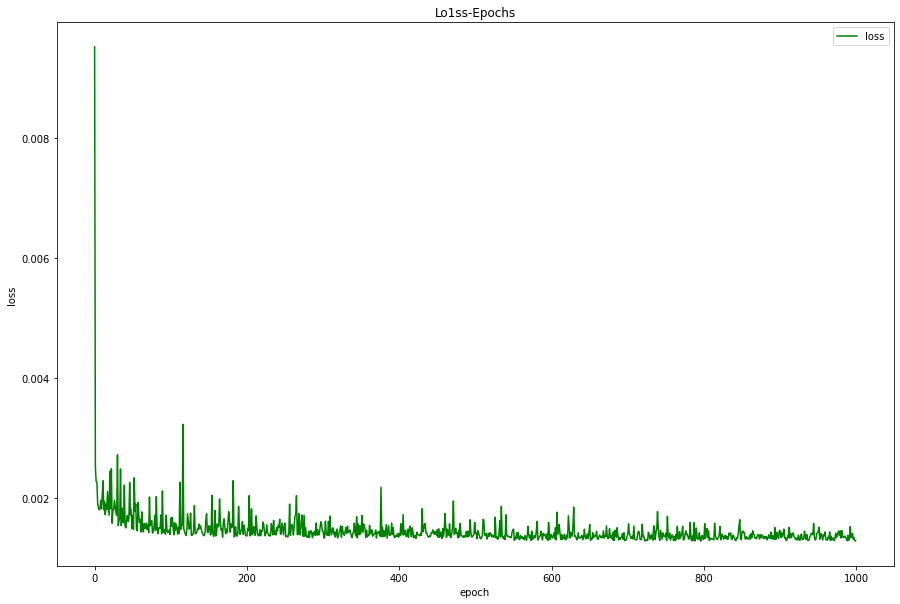

In [9]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    plot_loss = torch.zeros(epochs)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X.float()), y.float())
            l.backward()
            trainer.step()
            
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')
        
        plot_loss[epoch] = d2l.evaluate_loss(net, train_iter, loss)
    plot_loss_csv = pd.DataFrame({"loss":plot_loss[:]});
    plot_loss_csv.plot(figsize=(15,10), title="Lo1ss-Epochs", color='green', linestyle='-', xlabel='epoch', ylabel='loss')

#超参数设置
net = get_net()
train_times = 1000
lr = 0.005
train(net, train_iter, loss, train_times, lr)

rmse: 0.3403611154462768


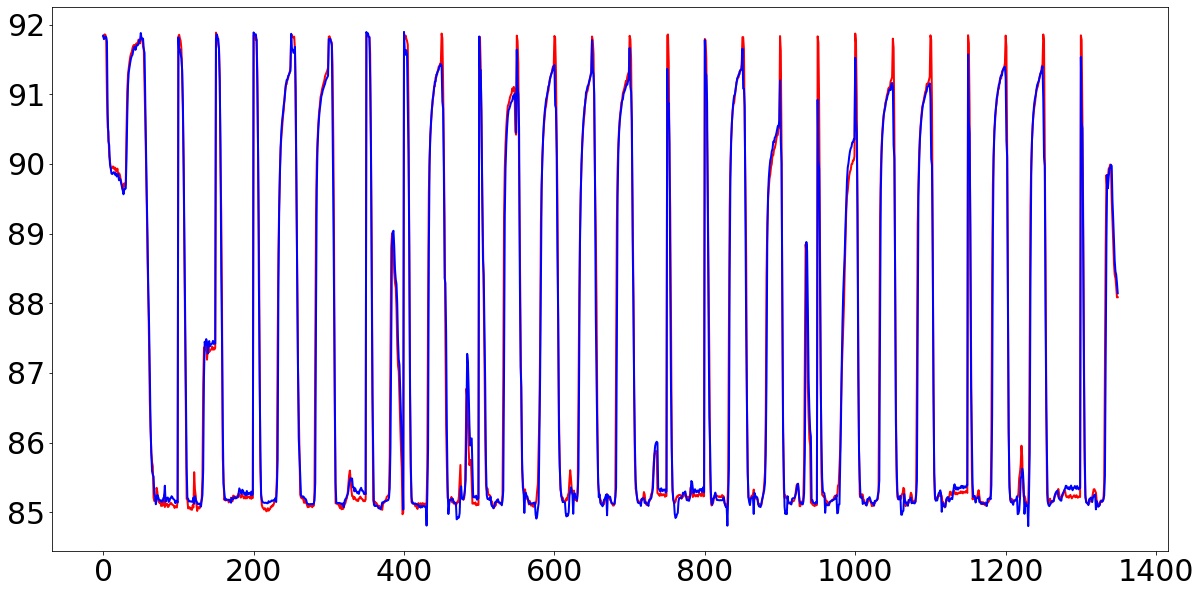

In [10]:
plt.figure(figsize=(20, 10))
y = net(input_total)   #用所有数据进行检验
show_labels = y_scaler.inverse_transform(height_labels)  #反归一化
y = y_scaler.inverse_transform(y.detach().numpy())

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.plot(show_labels, linestyle='-', color='red', linewidth=2, label='source')
plt.plot(y, linestyle='-', color='blue', linewidth=2, label='predict')
# plt.legend(fontsize=20)

error = y - show_labels
rmse = np.mean(error ** 2) ** 0.5
print("rmse:", rmse.item())

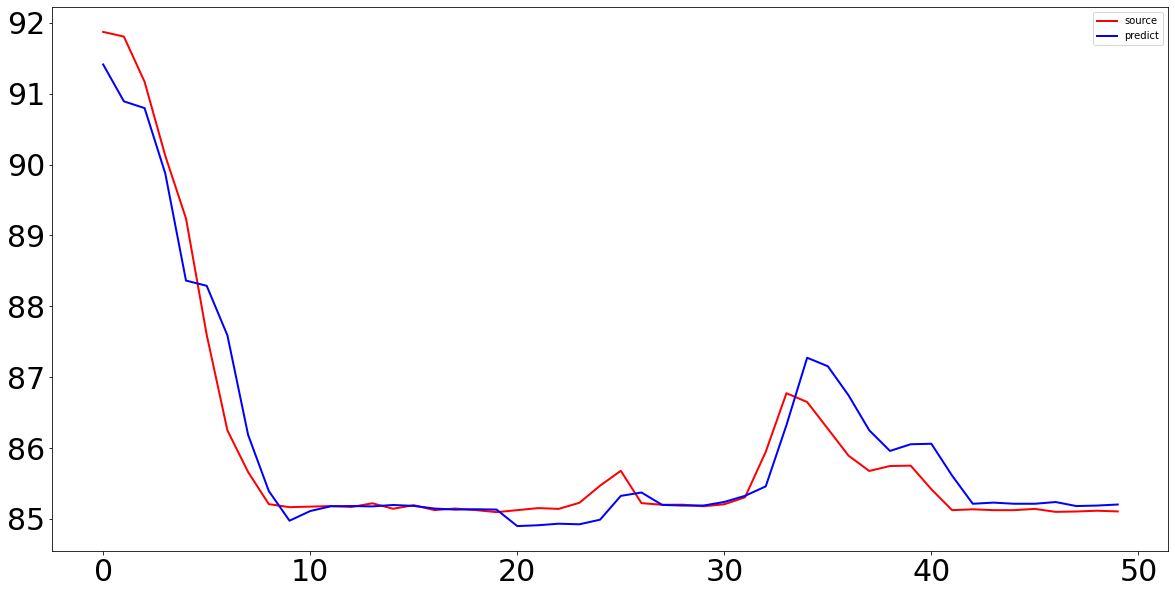

In [11]:
plt.figure(figsize=(20, 10))
experment = 10
show_plot = show_labels[(experment - 1) * 50:50*experment]
onestep_preds_csv = y[(experment - 1) * 50:50*experment]

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.plot(show_plot, linestyle='-', color='red', linewidth=2, label='source')
plt.plot(onestep_preds_csv, linestyle='-', color='blue', linewidth=2, label='predict')
plt.legend(fontsize=200)

plt.legend()
    